## Generazione istanze

85.90692637965812

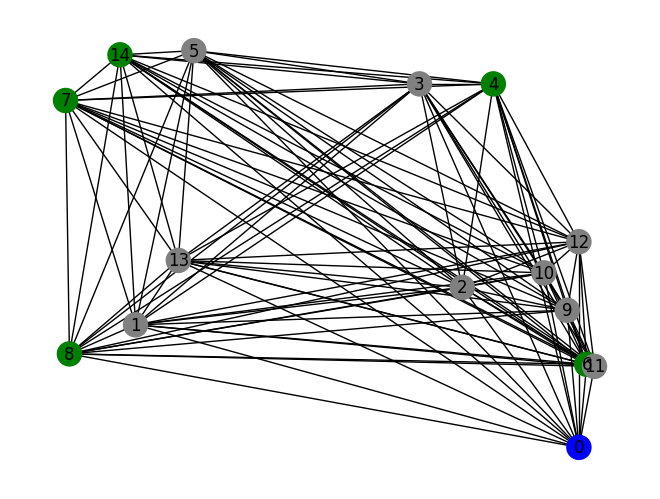

In [114]:
import networkx as nx 
import utility_function as uf

#generate a random graph
G=uf.random_euclidean_graph(15, 200)

#draw the graph with the type of node
uf.draw_graph(G)

#export in GML file
#nx.write_gml(G, "graph.gml")
G[1][2]['weight']

## Euristica greedy

Euristica Greedy per il problema GTSP

### Nearest Neighbour (variante con autonomia)

A partire dal deposito di sceglie di spostarsi verso il cliente più vicino. Prima di farlo però si controlla che una volta raggiunto il nodo successivo sia possibile raggiungere la colonnina più vicina (altrimenti si resterebbe bloccati). Se non è possibile raggiungere la colonnina più vicina si sceglie la seconda più vicina e così via.

In alcuni potrebbe non riuscire a trovare una soluzione ammissibile e bloccarsi ritornando None.

Per evitare loop fra colonnine si tiene traccia di quelle già visitate e se si ritorna in una già vista si blocca l'algortimo ritornando None. Ogni volta che si visita un cliente si resetta la lista delle colonnine visitate.

È una variante dell'algoritmo Nearest Neighbour per il TSP.

In [2]:
import networkx as nx 
import utility_function as uf

def greedy_nearest_neighbour(G : nx.Graph, batteria_max : int):
    
    clienti = [node for node in G.nodes if G.nodes[node]['type'] == "cliente"]
    collonnine = [node for node in G.nodes if G.nodes[node]['type'] == "colonnina"]

    #inizializzazione
    nodo_attuale = 0
    batteria = batteria_max
    nodi_visitati = []
    nodi_da_visitare = clienti.copy() #devo anche tornare al deposito quindi lo devo visitare una seconda volta
    soluzione = [0]
    collonnine_visitate = [] #per evitare cicli
    batteria_per_nodo = [batteria_max] #per ogni nodo della soluzione salvo la batteria rimanente ()

    soluzione_trovata = True

    for _ in range(2): #sserve imporre che l'ultimo nodo sia il deposito (quando ho visitato tutti i nodi aggiungo il deposito ai nodi da visitare)
        while len(nodi_da_visitare) > 0:
            print(nodi_da_visitare)
            #get the nearest node (cliente)
            nodo_prossimo = uf.get_nearest_node(G, nodo_attuale, nodi_da_visitare)

            #check if the battery is enough to go to the nearest node and to reach the nearest charging station
            if batteria - nodo_prossimo[0] - uf.get_nearest_node(G, nodo_prossimo[1], collonnine)[0] < 0:
            
                print("batteria insufficiente")

                #go to the nearest charging station
                nodo_prossimo = uf.get_nearest_node(G, nodo_attuale, collonnine) #la colonnina più vicina
                
                #se vero allora sono in loop e non posso raggiungere nessun cliente
                if(int(nodo_prossimo[1]) in collonnine_visitate):
                    print("sono in una colonnina ma non ho abbastanza batteria per raggiungere un cliente")
                    soluzione_trovata = False
                    break

                collonnine_visitate.append(nodo_prossimo[1])

                #aggiornamento dello stato
                batteria = batteria_max
                nodi_visitati.append(nodo_attuale)
                nodo_attuale = nodo_prossimo[1]
                soluzione.append(nodo_attuale)
                batteria_per_nodo.append(batteria)
            else:
                #aggiornamento dello stato
                batteria -= nodo_prossimo[0]
                nodi_visitati.append(nodo_attuale)
                nodo_attuale = nodo_prossimo[1]
                nodi_da_visitare.remove(nodo_attuale)
                soluzione.append(nodo_attuale)
                batteria_per_nodo.append(batteria)

                collonnine_visitate=[]
            
            print("nodo attuale: ", nodo_attuale, "batteria: ", batteria, "nodi da visitare: ", nodi_da_visitare, "soluzione: ", soluzione)
        
        print("torno al deposito")
        nodi_da_visitare=[0]

    if soluzione_trovata != False:
        #soluzione.append(0)
        print("soluzione: ", soluzione)
        return soluzione, batteria_per_nodo
    else:
        return None
    

[1, 4, 5, 6, 7, 8, 10, 11, 13, 14]
nodo attuale:  4 batteria:  144.34314575050763 nodi da visitare:  [1, 5, 6, 7, 8, 10, 11, 13, 14] soluzione:  [0, 4]
[1, 5, 6, 7, 8, 10, 11, 13, 14]
nodo attuale:  10 batteria:  107.28913112320981 nodi da visitare:  [1, 5, 6, 7, 8, 11, 13, 14] soluzione:  [0, 4, 10]
[1, 5, 6, 7, 8, 11, 13, 14]
nodo attuale:  13 batteria:  65.42028829229318 nodi da visitare:  [1, 5, 6, 7, 8, 11, 14] soluzione:  [0, 4, 10, 13]
[1, 5, 6, 7, 8, 11, 14]
batteria insufficiente
nodo attuale:  3 batteria:  150 nodi da visitare:  [1, 5, 6, 7, 8, 11, 14] soluzione:  [0, 4, 10, 13, 3]
[1, 5, 6, 7, 8, 11, 14]
nodo attuale:  14 batteria:  111.7900536509144 nodi da visitare:  [1, 5, 6, 7, 8, 11] soluzione:  [0, 4, 10, 13, 3, 14]
[1, 5, 6, 7, 8, 11]
nodo attuale:  11 batteria:  84.13142027903574 nodi da visitare:  [1, 5, 6, 7, 8] soluzione:  [0, 4, 10, 13, 3, 14, 11]
[1, 5, 6, 7, 8]
nodo attuale:  5 batteria:  57.11290810682314 nodi da visitare:  [1, 6, 7, 8] soluzione:  [0, 4, 10, 

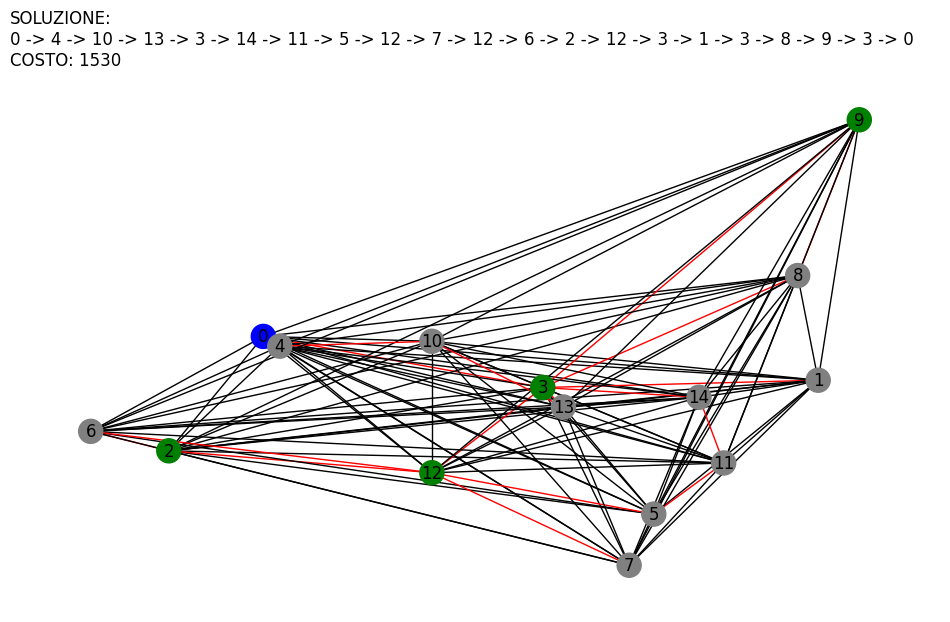

In [3]:
#RICHIEDE L'ESECUZIONE DELLA CELLA PRECEDENTE
import networkx as nx 
import utility_function as uf

#Caricamento del grafo da file
#scelta istanza
graph_file = "istances/graph.gml"
batteria_max = 150

#lettura grafo
G = nx.read_gml(graph_file, destringizer=int)

#applicazione algoritmo
soluzione, batteria_per_nodo = greedy_nearest_neighbour(G,batteria_max)

#controllo se la soluzione siste
if soluzione == None:
    print("soluzione non trovata. Batteria insufficiente per raggiungere tutti i clienti")
else:
    print("soluzione trovata:")
    print(soluzione)
    
    print("batteria_per_nodo:")
    print(batteria_per_nodo)

    costo = uf.costo(G, soluzione, batteria_per_nodo)
    print("costo: ", costo)

    #plot the solution
    uf.draw_solution(G, soluzione , costo)




In [16]:
for i in range(2):
    print(i)

0
1


In [37]:
import matplotlib.pyplot as plt
import pydot
from networkx.drawing.nx_pydot import graphviz_layout



'''
Calcolo del costo della soluzione, somma dei costi degli archi percorsi (strada) e dei tempi di ricarica (batteria)
G un grafo, soluzione una lista di nodi che rappresenta la soluzione del problema, batteria per nodo una lista che rappresenta la batteria rimanente per ogni nodo
'''
def costo(G : nx.Graph, soluzione : list, batteria_per_nodo : list):
    costo_strada = 0
    costo_batteria = 0
    #costo percorso stradale
    for i in range(len(soluzione)-1):

        print("arco:",soluzione[i], soluzione[i+1], "costo:", G[soluzione[i]][soluzione[i+1]]['weight'])

        #costo strada
        costo_strada += G[soluzione[i]][soluzione[i+1]]['weight']

        #se ho ricaricato la batteria
        if batteria_per_nodo[i+1] > batteria_per_nodo[i]:
            #costo batteria
            costo_batteria += batteria_per_nodo[i+1] - batteria_per_nodo[i]
            print("costo batteria:", batteria_per_nodo[i+1] - batteria_per_nodo[i])

   

    return int(costo_strada + costo_batteria) #approssimiamo all'intero più vicino

costo(G, soluzione, batteria_per_nodo)

arco: 0 4 costo: 5.656854249492381
arco: 4 10 costo: 37.05401462729781
arco: 10 13 costo: 41.86884283091664
arco: 13 3 costo: 9.433981132056603
costo batteria: 84.57971170770682
arco: 3 14 costo: 38.2099463490856
arco: 14 11 costo: 27.65863337187866
arco: 11 5 costo: 27.018512172212592
arco: 5 12 costo: 56.61271941887264
costo batteria: 92.88709189317686
arco: 12 7 costo: 61.220911460055866
arco: 7 12 costo: 61.220911460055866
costo batteria: 61.22091146005587
arco: 12 6 costo: 84.72307831990054
arco: 6 2 costo: 20.615528128088304
costo batteria: 84.72307831990054
arco: 2 12 costo: 64.6297145282261
arco: 12 3 costo: 44.204072210600685
arco: 3 1 costo: 67.06713054842886
arco: 1 3 costo: 67.06713054842886
costo batteria: 67.06713054842886
arco: 3 8 costo: 77.20103626247513
arco: 8 9 costo: 65.73431371817918
costo batteria: 77.20103626247513
arco: 9 3 costo: 134.27211177307072
arco: 3 0 costo: 71.16881339463234


1530

In [14]:
from ast import Tuple
#lettura grafo
G = nx.read_gml(graph_file, destringizer=int)
clienti = [node for node in G.nodes if G.nodes[node]['type'] == "cliente"]
collonnine = [node for node in G.nodes if G.nodes[node]['type'] == "colonnina"]
def get_nearest_node(G : nx.Graph, nodo_attuale : int, nodi_da_visitare : list):
    lenght_list = []
    for i in nodi_da_visitare:
        i = int(i) #altrinmenti è una stringa
        if i == nodo_attuale:
            print("passo")
            continue
        #print(G[nodo_attuale][i]['weight'])
        lenght_list.append ((G[nodo_attuale][i]['weight'],i))
    
    return min(lenght_list, key=lambda x: x[0])
   
nodi_da_visitare = [1, 5, 6, 7, 8]

get_nearest_node(G,11,collonnine)

(53.823786563191554, 3)

In [41]:
#get weight of edge 1->2

G[9][3]["weight"]


134.27211177307072

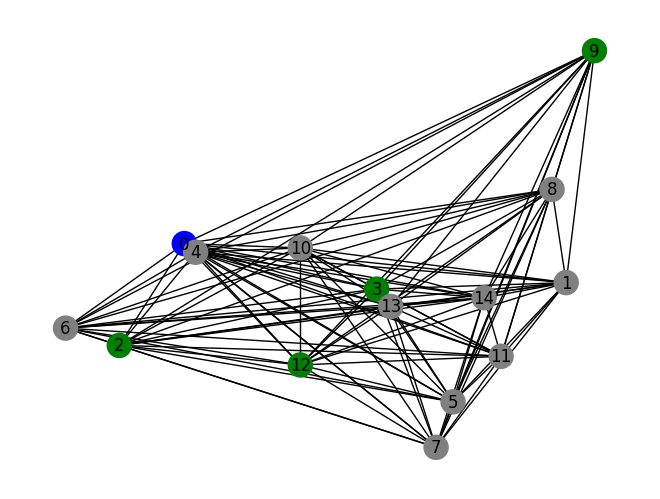

In [14]:
import networkx as nx
import utility_function as uf
graph_file = "istances/graph.gml"
G = nx.read_gml(graph_file, destringizer=int)
uf.draw_graph(G)